In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

from Inference.GeNVI_predictive import GeNPredVI
from Models import GeNetEns
#from Inference.GeNVI_predictive_implicit import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [3]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
#setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)
setup=Setup(device)

# Target density #

In [4]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model

def prior(n):
    return torch.randn(size=(n,param_count), device=device)

size_sample,param_count

(120, 151)

# Generative Network #

In [5]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=3


GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [ ]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=200#size_sample

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
                                                0, 1000, 100, 50,
                                                #kNNE, n_samples_KDE, n_samples_ED, n_samples_LP,
                                                20000, .01, .00001, 200, .5,
                                                device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 26357.693359375, Entropy 389.8664245605469, Learning Rate: 0.01
Epoch [1/20000], Loss: 31330.357421875, Entropy 382.0340576171875, Learning Rate: 0.01
Epoch [2/20000], Loss: 32077.013671875, Entropy 369.07330322265625, Learning Rate: 0.01
Epoch [3/20000], Loss: 15994.7451171875, Entropy 324.71295166015625, Learning Rate: 0.01
Epoch [4/20000], Loss: 14115.5556640625, Entropy 325.0340270996094, Learning Rate: 0.01
Epoch [5/20000], Loss: 19036.169921875, Entropy 343.0360412597656, Learning Rate: 0.01
Epoch [6/20000], Loss: 11806.990234375, Entropy 323.1642150878906, Learning Rate: 0.01
Epoch [7/20000], Loss: 10068.7431640625, Entropy 324.7192687988281, Learning Rate: 0.01
Epoch [8/20000], Loss: 12012.2236328125, Entropy 328.830322265625, Learning Rate: 0.01
Epoch [9/20000], Loss: 14194.2470703125, Entropy 310.0740966796875, Learning Rate: 0.01
Epoch [10/20000], Loss: 7949.1103515625, Entropy 256.0837707519531, Learning Rate: 0.01
Epoch [11/20000], Loss: 9522.1669921

Epoch [92/20000], Loss: 5014.57177734375, Entropy 1741.1689453125, Learning Rate: 0.01
Epoch [93/20000], Loss: 1394.3743896484375, Entropy 1929.6190185546875, Learning Rate: 0.01
Epoch [94/20000], Loss: 1408.7740478515625, Entropy 1646.6651611328125, Learning Rate: 0.01
Epoch [95/20000], Loss: 3156.40234375, Entropy 1149.9676513671875, Learning Rate: 0.01
Epoch [96/20000], Loss: 2312.263671875, Entropy 1102.1968994140625, Learning Rate: 0.01
Epoch [97/20000], Loss: 465.3133544921875, Entropy 2591.29052734375, Learning Rate: 0.01
Epoch [98/20000], Loss: 621.405517578125, Entropy 2821.25927734375, Learning Rate: 0.01
Epoch [99/20000], Loss: 55.9375, Entropy 3753.279541015625, Learning Rate: 0.01
Epoch [100/20000], Loss: 661.581787109375, Entropy 2863.13818359375, Learning Rate: 0.01
Epoch [101/20000], Loss: -2027.3095703125, Entropy 4329.19482421875, Learning Rate: 0.01
Epoch [102/20000], Loss: 719.8800048828125, Entropy 1544.3468017578125, Learning Rate: 0.01
Epoch [103/20000], Loss: 34

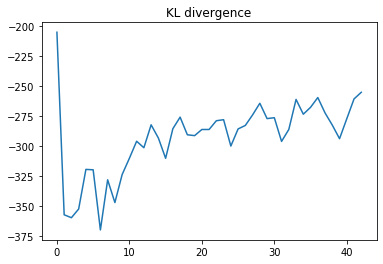

In [7]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

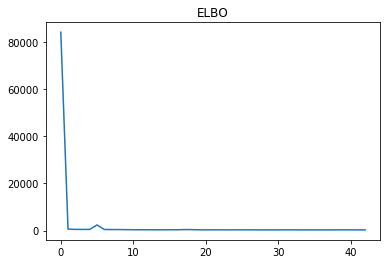

In [8]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


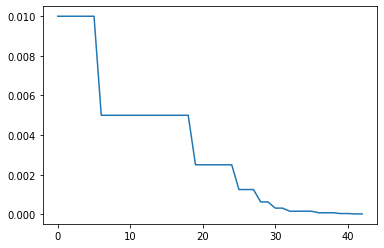

In [9]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


In [18]:
%matplotlib inline
show(GeN,1000)

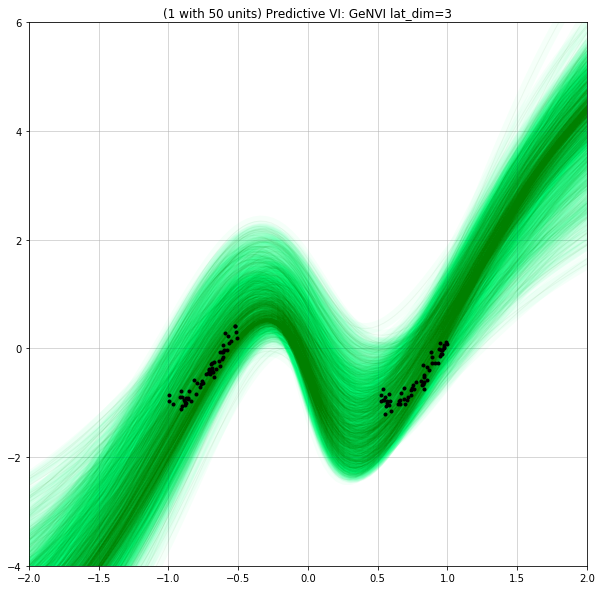

NameError: name 'scores' is not defined

In [17]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('('+str(nblayers)+' with '+str(layerwidth)+' units) Predictive VI: GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

    
show(GeN,1000)
scores

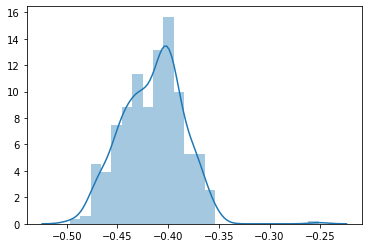

In [35]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

X=torch.Tensor([[-.7]]).to(device)#torch.arange(-2.,2.,0.1)
Y=model(X,GeN(500).detach()).squeeze().cpu()

sns.distplot(Y)

In [36]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [37]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.8587), tensor(0.6231))
SE_valid: (tensor(0.0103), tensor(0.0147))
nLPP_test: (tensor(0.3586), tensor(1.1520))
SE_test: (tensor(0.4413), tensor(0.7950))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$